# Tokens Analysis

## Intro

### Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from dotenv import load_dotenv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm, trange

from helixirapi.helixir_api import HelixirApi

### Create client instance

In [4]:
load_dotenv()
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = HelixirApi(auth_token=AUTH_TOKEN)
client

## Tokens Analysis

Select number of tokens by setting the `number` variable.

In [8]:
number = 201

tokens = []
n_pages = -(number//-100)
for p in trange(1, n_pages +1, leave=False):
    limit = number%p if number%p else 100
    tokens += client.get_tokens(page=p, limit=limit)
    
tokens = pd.DataFrame([t.to_dict() for t in tokens])
tokens

  0%|          | 0/3 [00:00<?, ?it/s]

,circulating_supply,contract,decimals,liquidity_usd,market_cap,name,price_change_24_h,price_change_7_d,price_peg,price_usd,symbol,total_supply,volume_24_h
0,3.879969e+09,0x55d398326f99059fF775485246999027B3197955,18.0,2.495743e+08,3.876588e+09,Tether USD,0.115,-0.881,0.002721,0.999128,USDT,3.879998e+09,4.131985e+08
1,5.430264e+06,0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c,18.0,1.713100e+08,1.947738e+09,Wrapped BNB,-0.819,-14.350,1.000000,367.198456,WBNB,5.430270e+06,5.948389e+08
2,2.700170e+08,0x0E09FaBB73Bd3Ade0a17ECC321fD13a19e81cE82,18.0,1.146928e+08,1.875160e+09,PancakeSwap Token,-3.091,-16.532,0.019048,6.994315,Cake,6.495707e+08,1.826528e+07
3,1.779000e+09,0x8AC76a51cc950d9822D68b83fE1Ad97B32Cd580d,18.0,6.817776e+07,1.777608e+09,USD Coin,-0.510,0.035,0.002721,0.999218,USDC,1.779000e+09,2.114167e+07
4,1.124942e+05,0x7130d2A12B9BCbFAe4f2634d864A1Ee1Ce3Ead9c,18.0,6.589762e+07,4.252119e+09,BTCB Token,0.885,-15.281,102.935409,37798.573553,BTCB,1.125010e+05,4.796855e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,4.960000e+08,0x92dA433dA84d58DFe2aade1943349e491Cbd6820,18.0,5.584520e+05,9.820198e+06,Rise of Defenders Token,-9.886,-48.564,0.000054,0.019799,RDR,4.960000e+08,6.426376e+04
197,4.989610e+08,0x6911F552842236bd9E8ea8DDBB3fb414e2C5FA9d,18.0,5.515844e+05,7.294360e+07,Synapse Network,-1.243,-2.038,0.000410,0.146128,SNP,4.990610e+08,5.252571e+04
198,2.811515e+06,0xA6e78aD3c9B4a79A01366D01ec4016EB3075d7A0,18.0,5.510566e+05,1.387336e+06,Hashland Coin,0.000,-97.630,0.001257,0.493944,HC,2.811515e+06,3.513411e+04
199,5.000000e+06,0x0496CcD13c9848f9c7d1507D1dd86a360B51b596,18.0,5.505057e+05,6.193350e+06,Royal Gold,-4.354,-44.036,0.003367,1.238670,RGOLD,5.000000e+06,1.986553e+05


### Decimals

In [33]:
tokens.loc[tokens["decimals"] <= 5]

,circulating_supply,contract,decimals,liquidity_usd,market_cap,name,price_change_24_h,price_change_7_d,price_peg,price_usd,symbol,total_supply,volume_24_h
94,9.600000e+11,0xA38898a4Ae982Cb0131104a6746f77fA0dA57aAA,2.0,1.611678e+06,1.116856e+08,Project Quantum,1.050,-21.614,3.163104e-07,1.163391e-04,QBIT,1.000000e+12,42968.460526
114,3.844595e+09,0xFC206f429d55c71cb7294EfF40c6ADb20dC21508,5.0,7.353339e+05,2.431856e+07,DeHub,-3.275,-9.155,1.717983e-05,6.320387e-03,DeHub,8.000000e+09,34389.744315
170,6.478947e+14,0x6316B03FF4319173d36711dF37f3DaC107964C47,0.0,6.093346e+05,5.348464e+07,AOCOMapping,5.076,-0.060,2.237783e-10,8.217268e-08,AOCO,1.992000e+15,83300.111748


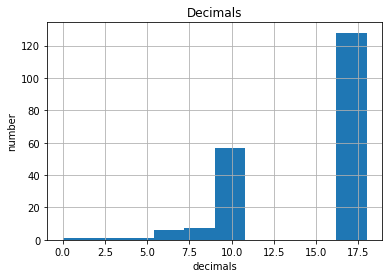

In [27]:
plt.figure(facecolor="white")
tokens["decimals"].hist()
plt.title("Decimals")
plt.ylabel("number")
plt.xlabel("decimals")
plt.show()

### Market Capitalization

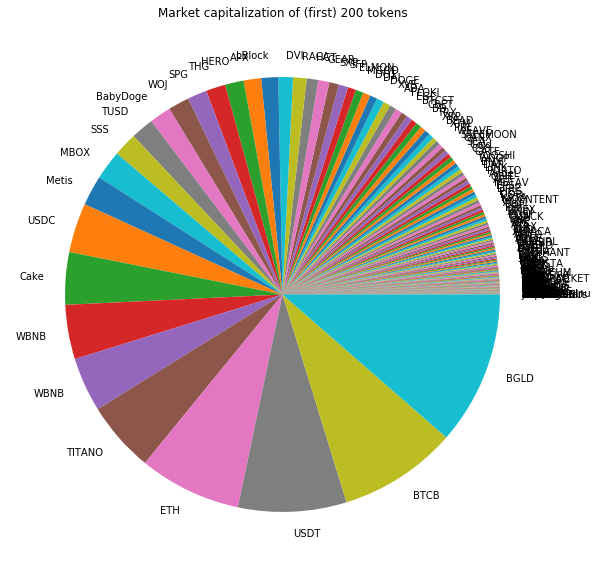

In [6]:
tokens = tokens.loc[tokens["market_cap"] != 0].sort_values(by=["market_cap"])

plt.figure(facecolor="white", figsize=(10, 10))
plt.pie(
    tokens["market_cap"],
    labels = tokens["symbol"],
)
number = tokens.shape[0]
plt.title(f"Market capitalization of (first) {number} tokens")
plt.show()

### Price Change - Treemap

In [7]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import plotly.express as px

df = tokens
fig = px.treemap(df, path=["symbol"], values='market_cap',
                  # color="price_change_24_h",
                  color="price_change_7_d",
                  color_continuous_scale=["red", "green"],
                  color_continuous_midpoint=0,
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Price PEG

In [14]:
# !pip install wordcloud
from wordcloud import WordCloud

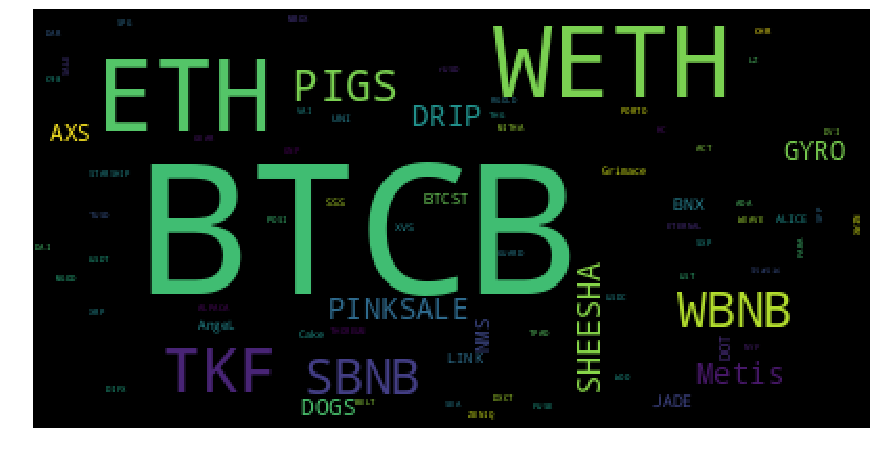

In [37]:
wc = WordCloud()
wc.generate_from_frequencies(tokens[["symbol", 'price_peg']].set_index("symbol").to_dict()['price_peg'])

# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()